<a href="https://colab.research.google.com/github/JEAtole/Yolov8s-in-Waste-Segregation/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PERFORMANCE ANALYSIS OF YOLOV8S IN WASTE SEGREGATION

---

Presented by: Jhan Ellen O. Atole

## Process:

- Ensure Access to GPU
- Install YOLOv8
- Prepare Custom Dataset (From Roboflow)
- Custom Training
- Validate Custom Model
- Inference with Custom Model

---

## Ensure Access to GPU

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Sep 22 23:21:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


---

## Install YOLOv8

In [19]:
# Pip install method (recommended)

!pip install ultralytics==8.2.99

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

---

## Preparing a Custom Dataset




In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# Insert dataset download code snippet from roboflow.

# from roboflow import Roboflow
# rf = Roboflow(api_key="")
# project = rf.workspace("").project("")
# version = project.version()
# dataset = version.download("yolov8")


---

## Custom Training

In [20]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Waste-Segregation-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid

In [23]:
!ls {HOME}/runs/detect/train6/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1727047981.257d8c527f1c.4564.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch960.jpg	weights
P_curve.png					    train_batch961.jpg
PR_curve.png					    train_batch962.jpg


/content


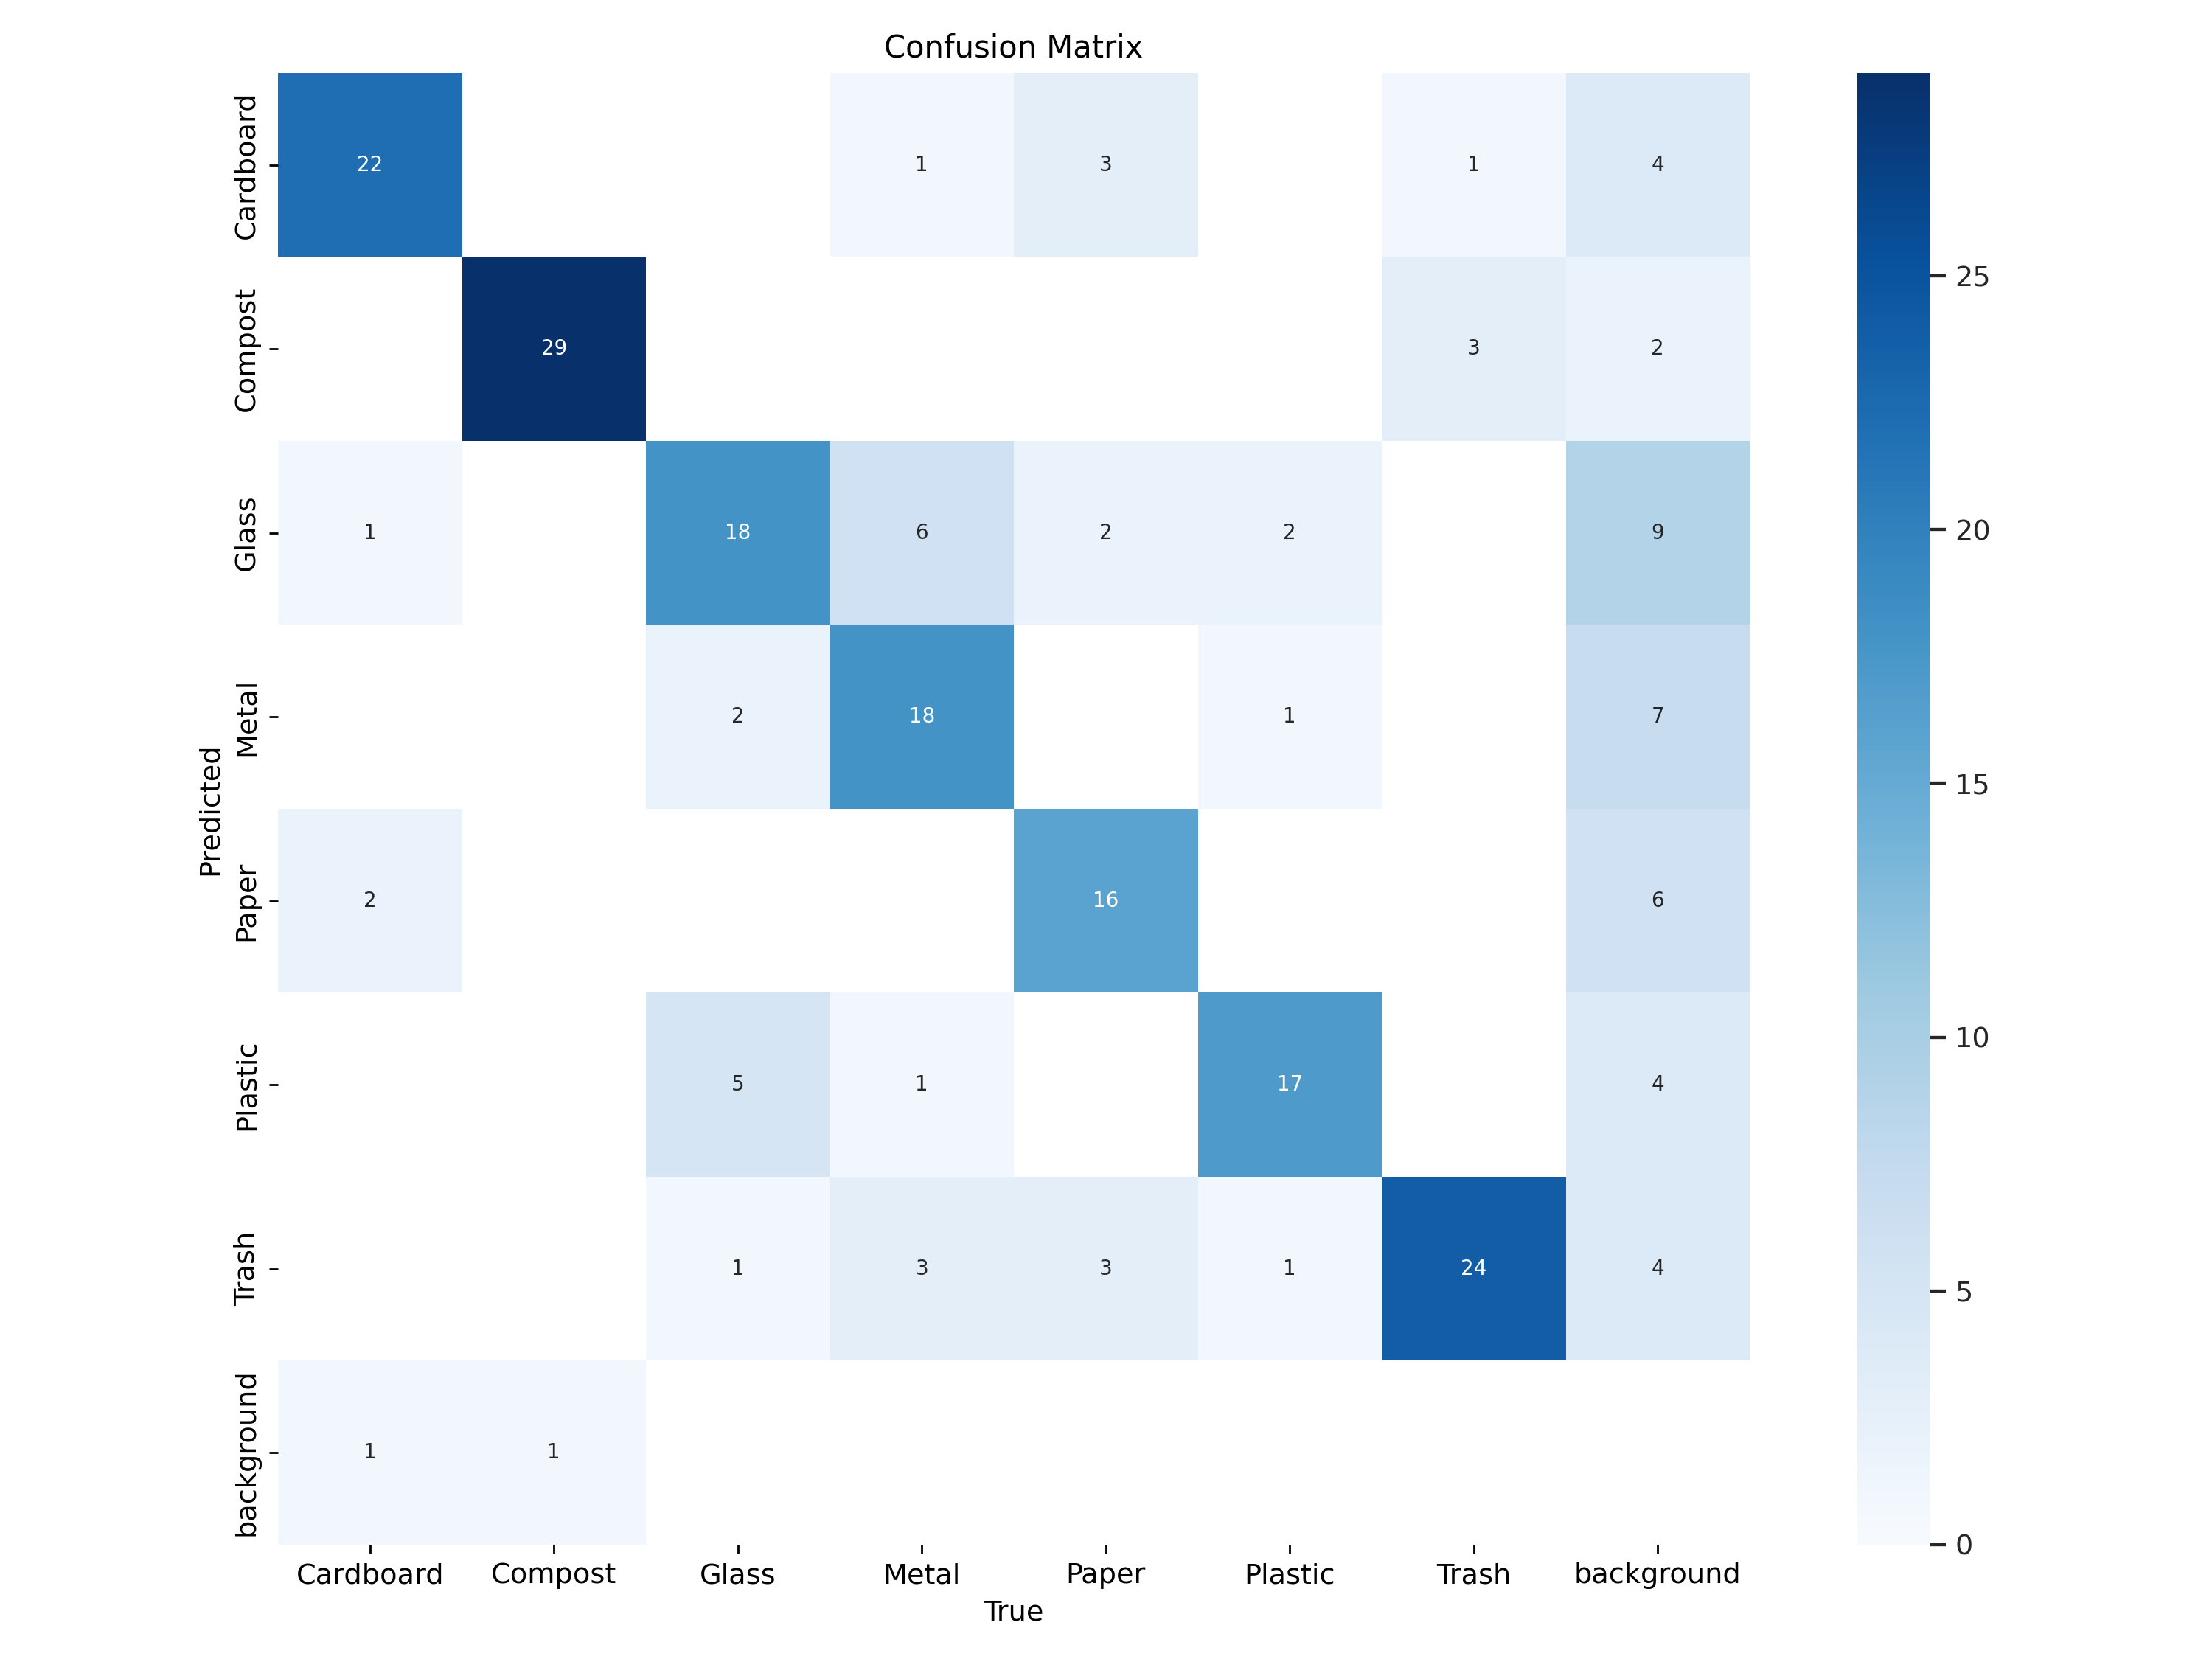

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


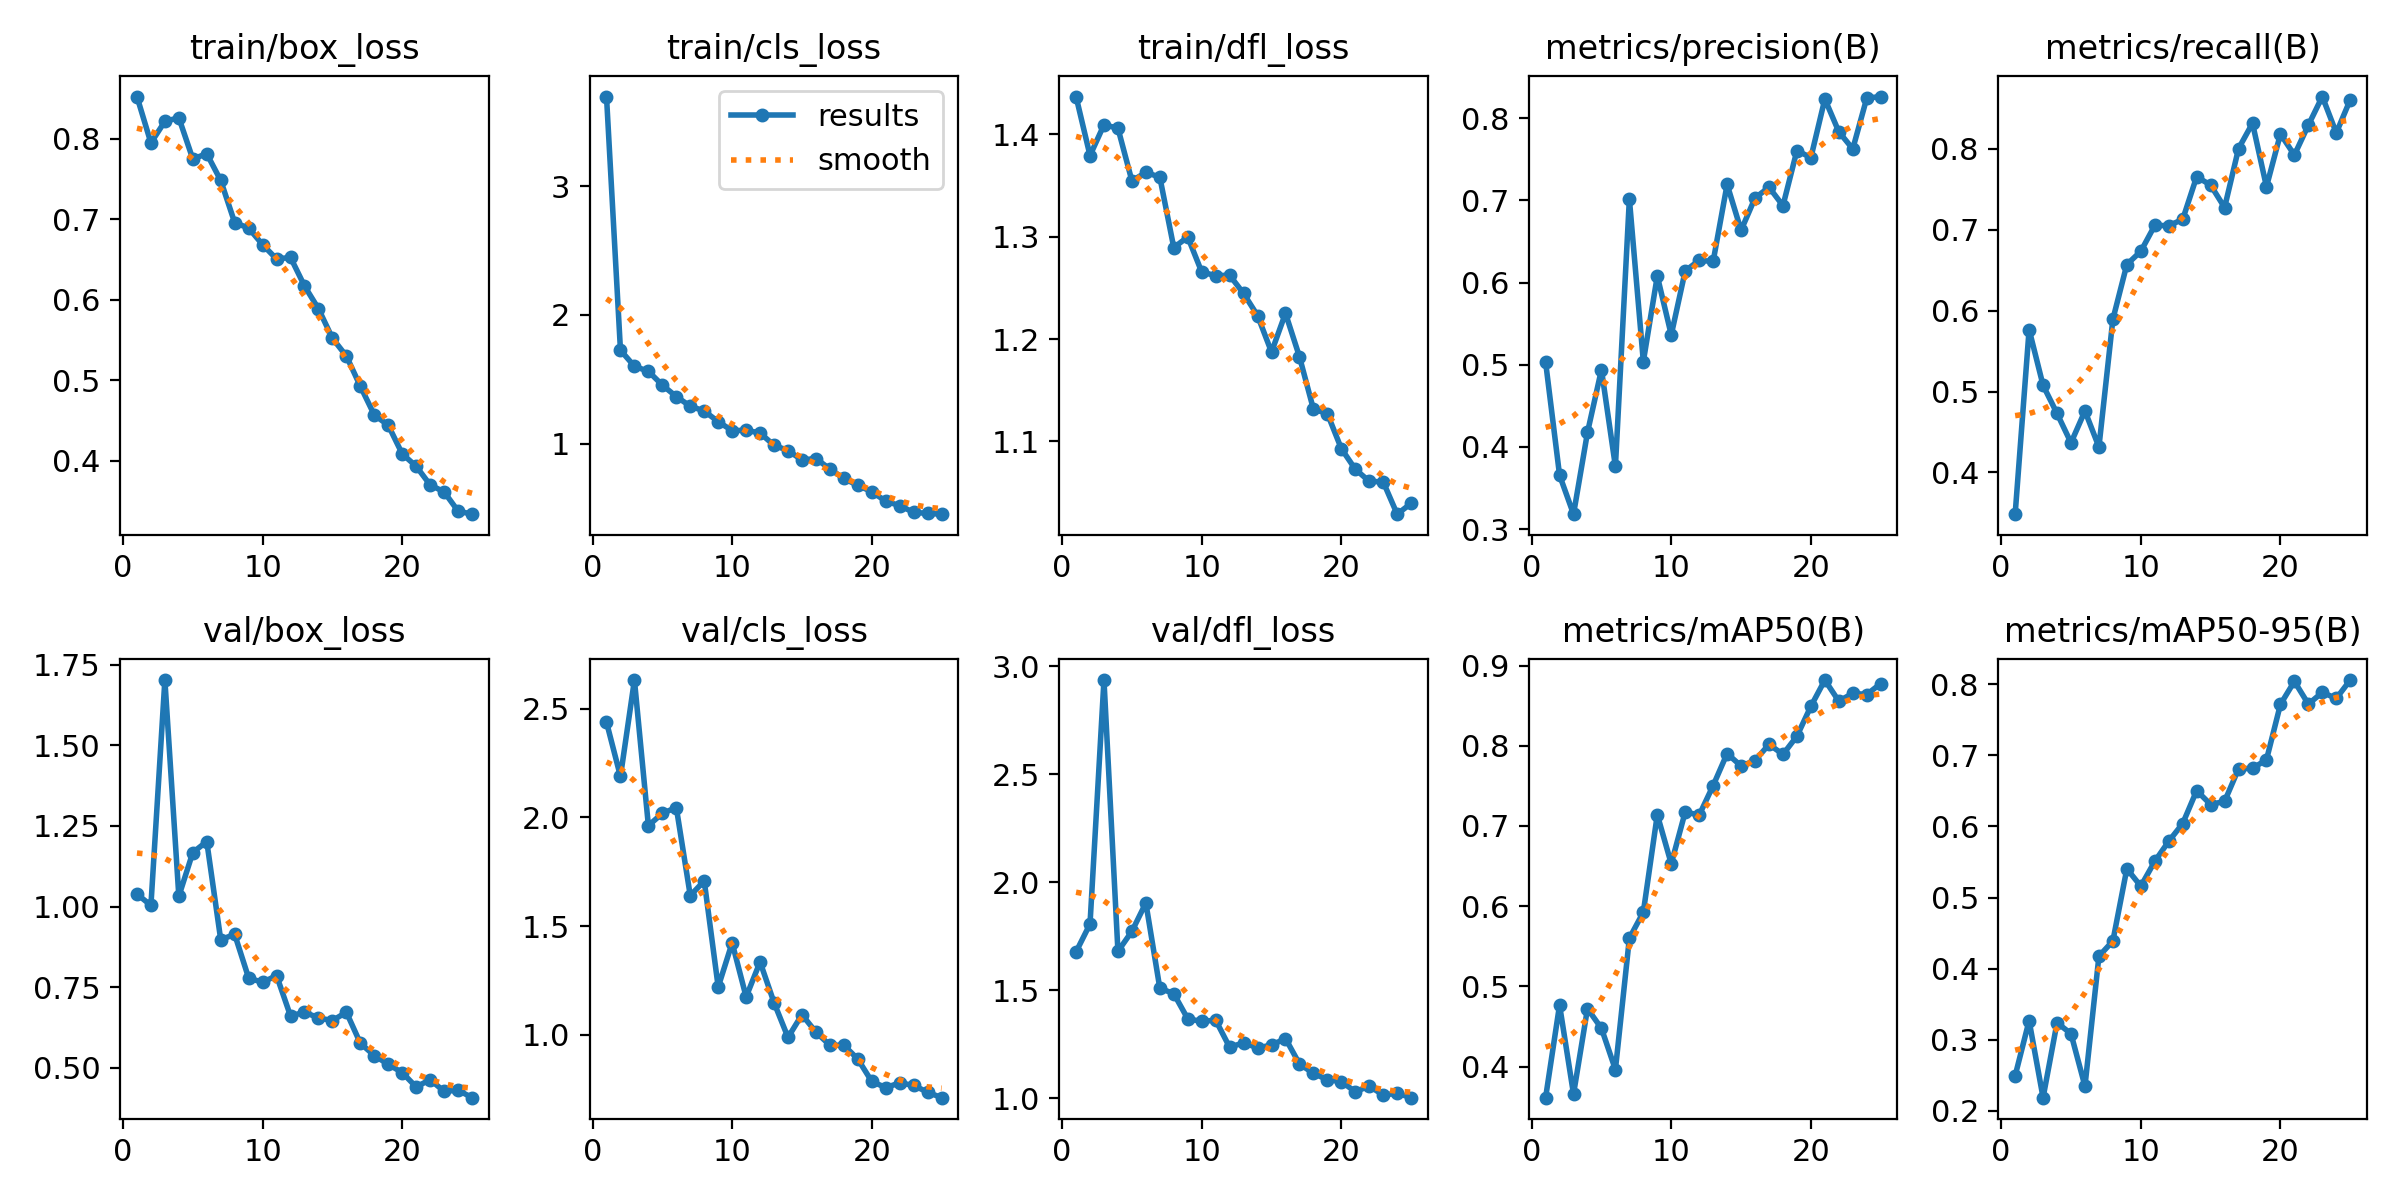

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content


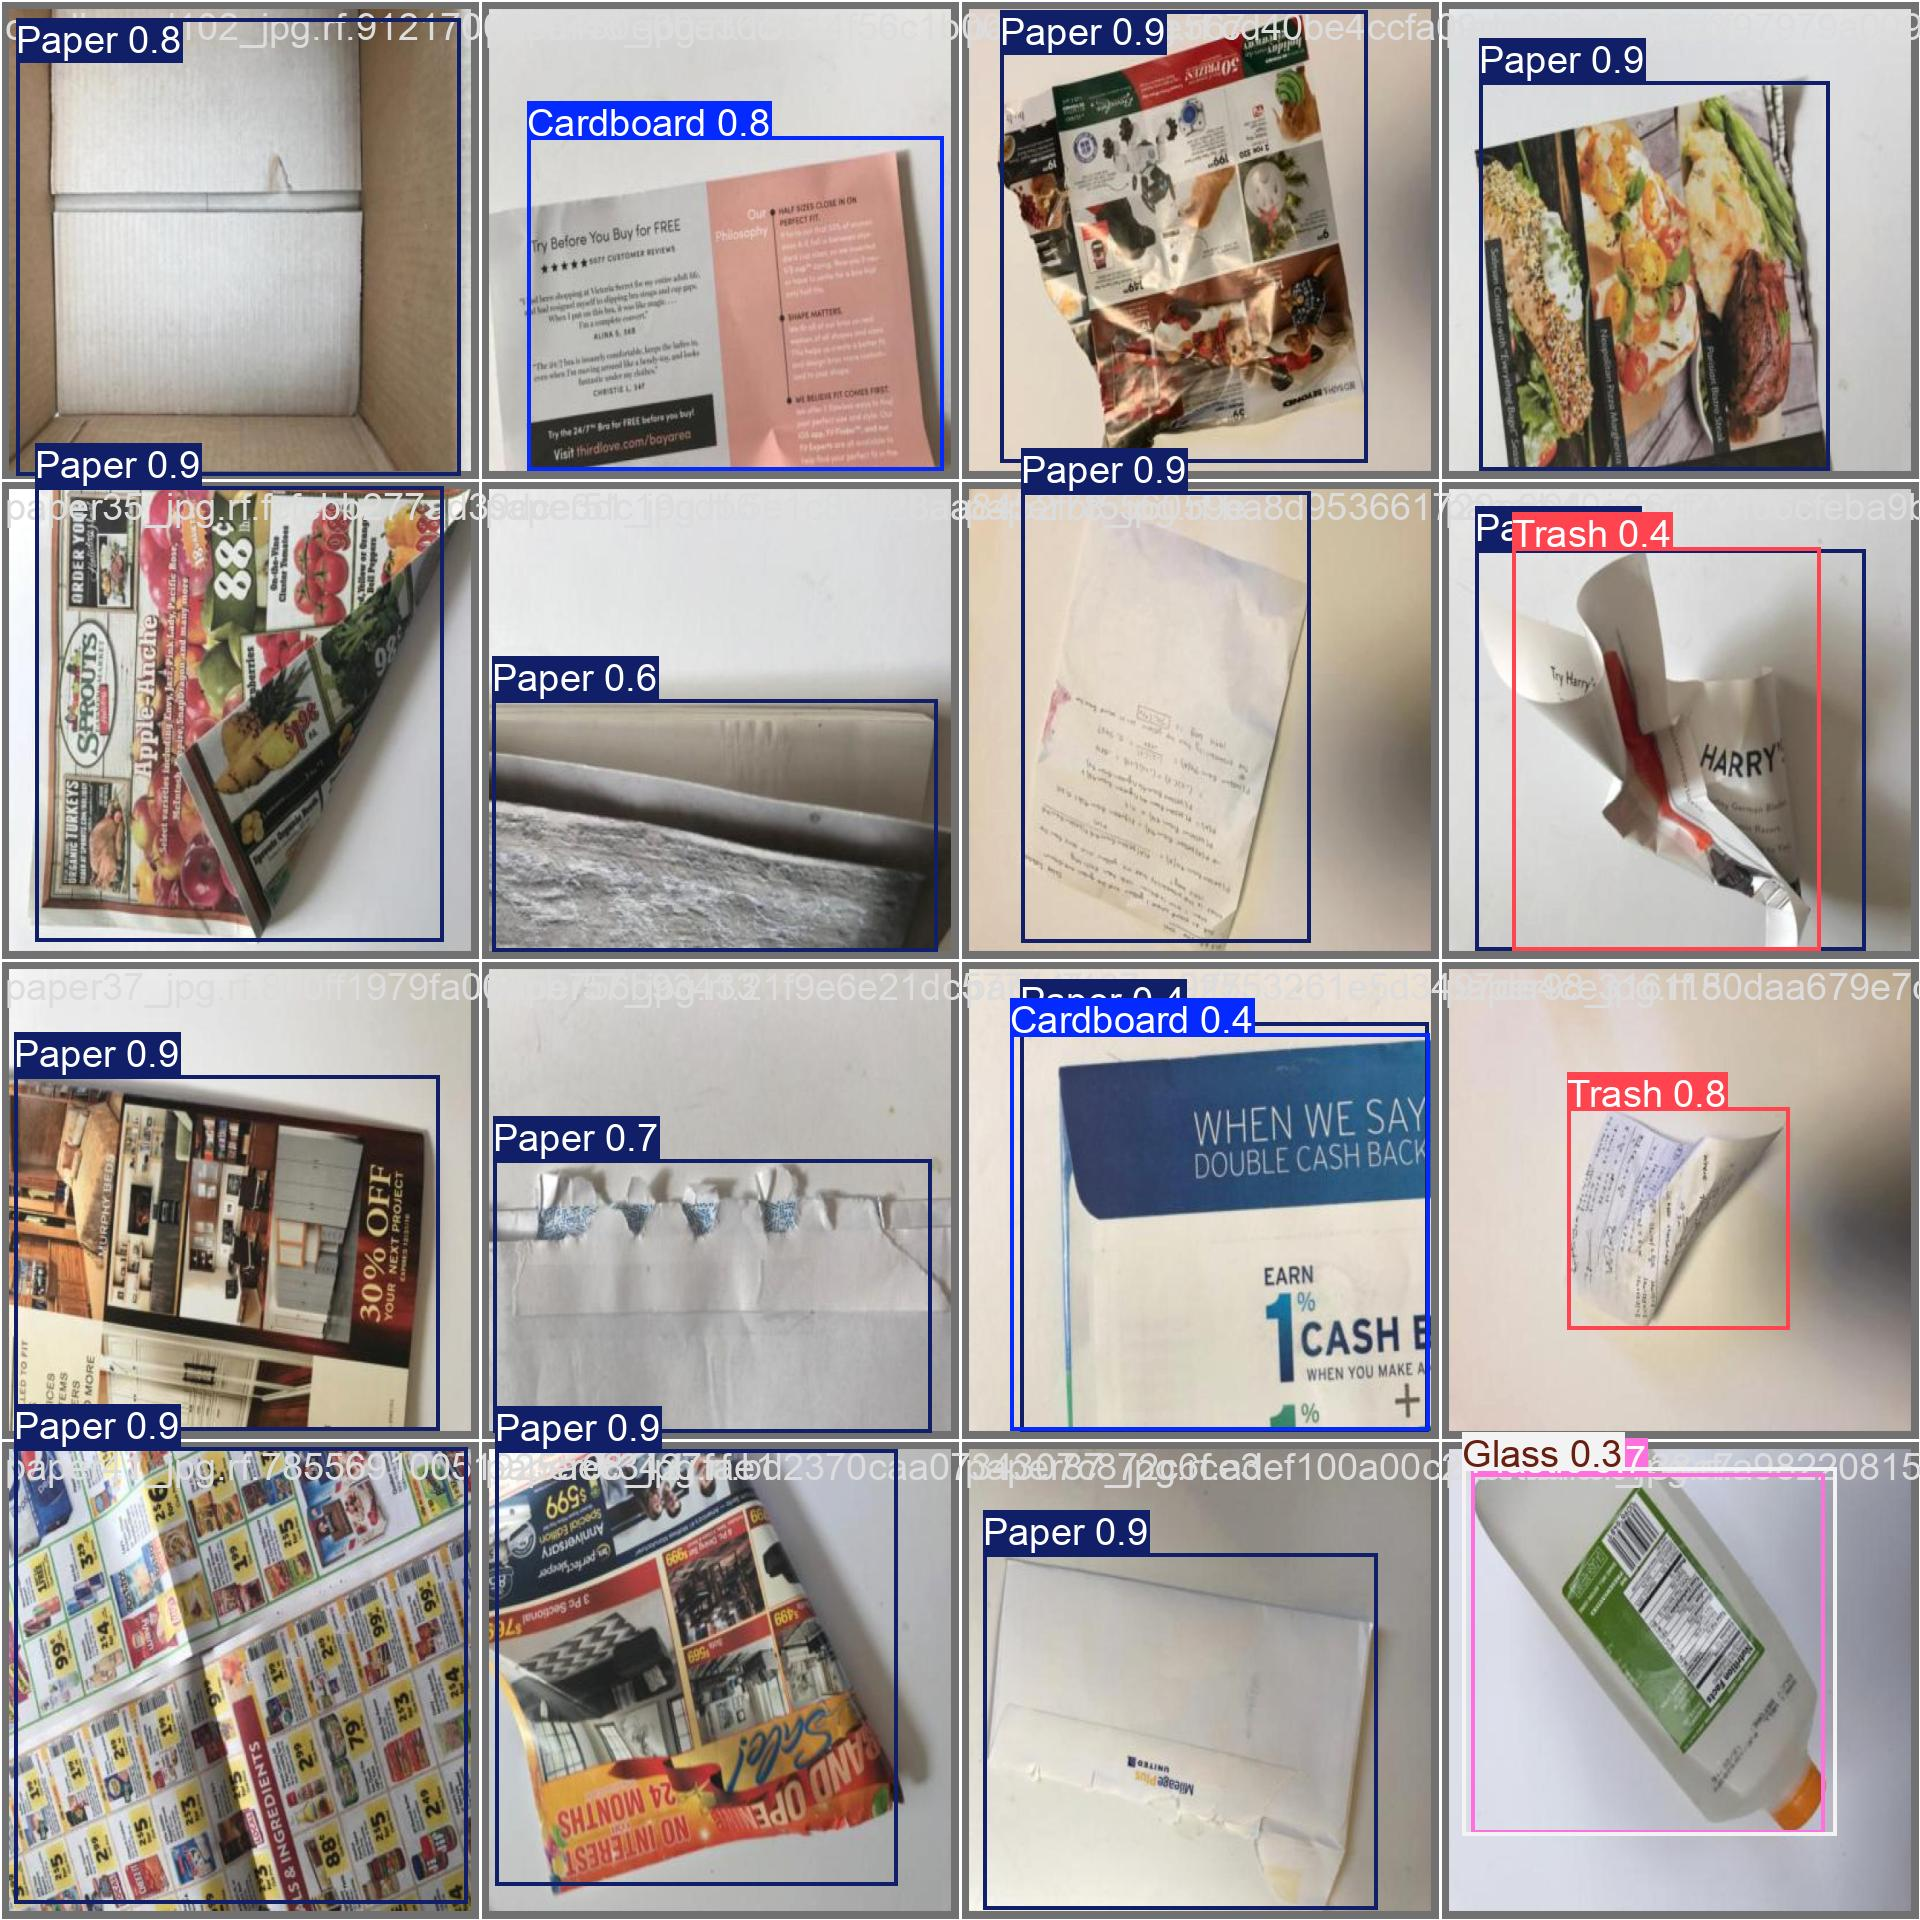

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

---

## Validate Custom Model

In [27]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Waste-Segregation-4/valid/labels.cache... 167 images, 0 backgrounds, 0 corrupt: 100% 167/167 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 184. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:05<00:00,  1.98it/s]
                   all        167        184      0.826      0.861      0.877      0.806
             Cardboard         25         26      0.822      0.846      0.877      0.811
               Compost         16         30      0.864      0.967      0.917      0.848
              

---

## Inference with Custom Model

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/83 /content/datasets/Waste-Segregation-4/test/images/cardboard107_jpg.rf.22e4cae8f467dcabda622b23e612ae70.jpg: 800x800 1 Cardboard, 22.8ms
image 2/83 /content/datasets/Waste-Segregation-4/test/images/cardboard144_jpg.rf.b0346abc12c0559409d66b4199259c8b.jpg: 800x800 1 Cardboard, 22.9ms
image 3/83 /content/datasets/Waste-Segregation-4/test/images/cardboard147_jpg.rf.885b3b838e8c1fb6696ac87e424b6638.jpg: 800x800 1 Cardboard, 22.8ms
image 4/83 /content/datasets/Waste-Segregation-4/test/images/cardboard18_jpg.rf.702ed642e92fd5e403fefad2fd187594.jpg: 800x800 1 Cardboard, 22.8ms
image 5/83 /content/datasets/Waste-Segregation-4/test/images/cardboard33_jpg.rf.95e778a324e7c8d2d246ee2655113d56.jpg: 800x800 1 Cardboard, 22.8ms
image 6/83 /content/datasets/Waste-Segregation-4/test/images/cardboard34_jpg.rf.998691e

**NOTE:** Let's take a look at few results.

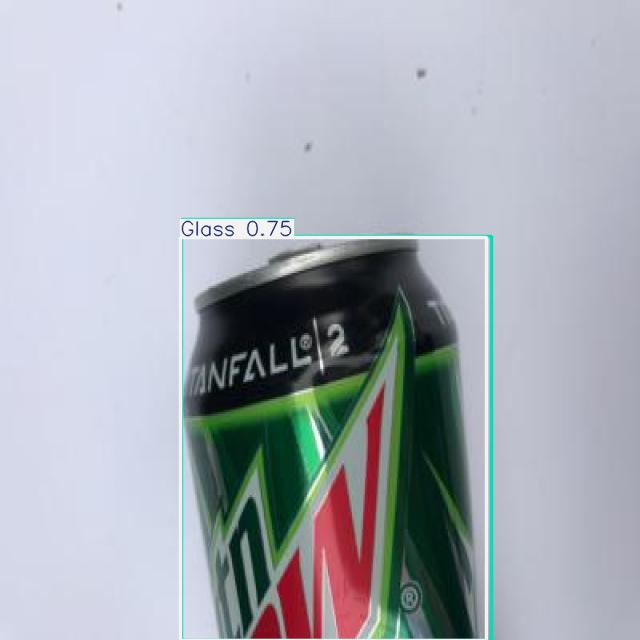

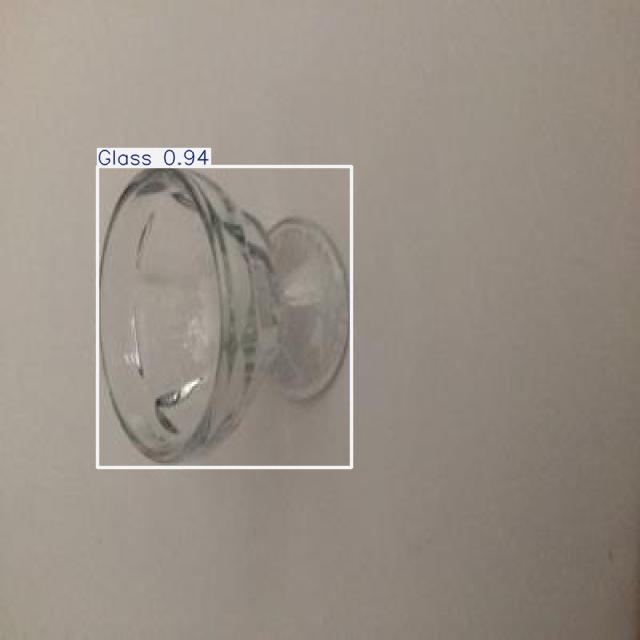

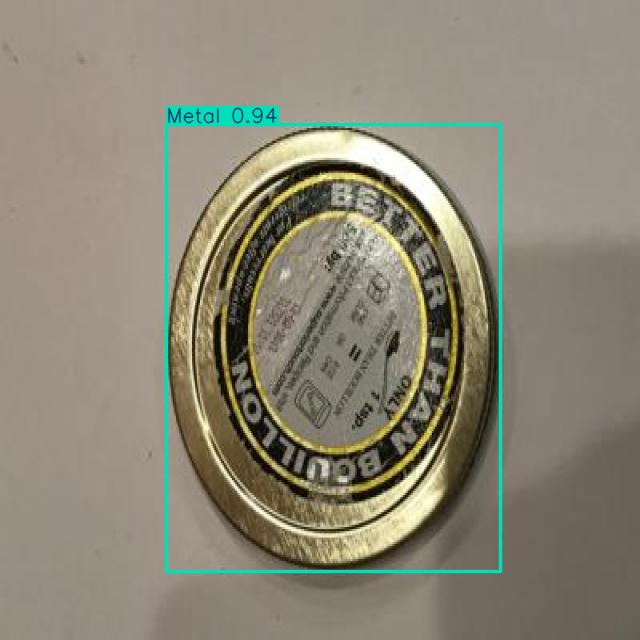

In [29]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")